# **Data Wrangling, Exploratory Data Analysis, and Vizualization**

# **A. Data Wrangling**

In [131]:
#Import Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignoring Warning during trainings
import warnings
warnings.filterwarnings('ignore')

In [132]:
#Mount Google Driv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
#Initialize an empty list for the list of chunks created from the dataset.
all_chunks = []

#import the dataset and break it into chunks of 500,000
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NUTRITION2001_2022.zip', chunksize=500000)

for chunk in data:
    # Extract the needed columns
    cols_to_extract = ['REF_AREA:Geographic area', 'TIME_PERIOD:Time period', 'INDICATOR:Indicator',
                    'RESIDENCE:Residence', 'WEALTH_QUINTILE:Wealth Quintile', 'MATERNAL_EDU_LVL:Mother\'s Education Level', 'OBS_VALUE:Observation Value']
    chunk = chunk[cols_to_extract]

    # Rename columns
    chunk = chunk.rename(columns={'REF_AREA:Geographic area':'Country'
                                ,'TIME_PERIOD:Time period':'Year'
                                ,'INDICATOR:Indicator':'Indicator'
                                ,'RESIDENCE:Residence':'Residence'
                                ,'WEALTH_QUINTILE:Wealth Quintile':'Poverty_Rating'
                                ,'MATERNAL_EDU_LVL:Mother\'s Education Level':'Maternal_Education'
                                ,'OBS_VALUE:Observation Value':'Observation_Value'})

    # Clean up values - remove colons and values before it
    chunk['Country'] = chunk['Country'].apply(lambda x:x[x.index(':')+1:])
    chunk['Indicator'] = chunk['Indicator'].apply(lambda x:x[x.index(':')+1:])
    chunk['Residence'] = chunk['Residence'].apply(lambda x:x[x.index(':')+1:])
    chunk['Poverty_Rating'] = chunk['Poverty_Rating'].apply(lambda x:x[x.index(':')+1:])
    chunk['Maternal_Education'] = chunk['Maternal_Education'].apply(lambda x:x[x.index(':')+1:])

    chunk = chunk[~chunk['Year'].str.contains('-', na=False)]

    all_chunks.append(chunk)

df = pd.concat(all_chunks)

In [134]:
#convert Year column to date datatype
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177962 entries, 0 to 2398605
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Country             object        
 1   Year                datetime64[ns]
 2   Indicator           object        
 3   Residence           object        
 4   Poverty_Rating      object        
 5   Maternal_Education  object        
 6   Observation_Value   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 132.9+ MB


In [136]:
df.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value
0,Afghanistan,2015-01-01,Continued breastfeeding (12-15 months),Total,Total,Total,78.9
1,Afghanistan,2015-01-01,Continued breastfeeding (12-15 months),Total,Total,Total,77.9
2,Afghanistan,2015-01-01,Continued breastfeeding (12-15 months),Total,Total,Total,78.8
3,Afghanistan,2015-01-01,Continued breastfeeding (12-15 months),Total,Lowest,Total,86.1
4,Afghanistan,2015-01-01,Continued breastfeeding (12-15 months),Total,Second,Total,75.1


## **Observations.**

*   `Country` column is of Object(String) Datatype.
*   `Year` column is of Object(String) Datatype. it was converted to Datetime datatype
*   `Indicator` column is of Object(String) Datatype.
*   `Residence` column is of Object(String) Datatype.
*   `Maternal_Education` column is of Object(String) Datatype.
*   `Poverty_Rating` column is of Object(String) Datatype.
*   `Observation_value` column is of Float(Number) Datatype.















### **Extract Only Numbers from Dataset**

In [137]:
#Extract Numbers Observation_value from the dataframe

df.select_dtypes("number").head()

,Observation_Value
0,78.9
1,77.9
2,78.8
3,86.1
4,75.1


### **Extract Only Strings from Dataset**

In [138]:
#Extracting only the categorical variables from the dataframe
df.select_dtypes("object").head()

,Country,Indicator,Residence,Poverty_Rating,Maternal_Education
0,Afghanistan,Continued breastfeeding (12-15 months),Total,Total,Total
1,Afghanistan,Continued breastfeeding (12-15 months),Total,Total,Total
2,Afghanistan,Continued breastfeeding (12-15 months),Total,Total,Total
3,Afghanistan,Continued breastfeeding (12-15 months),Total,Lowest,Total
4,Afghanistan,Continued breastfeeding (12-15 months),Total,Second,Total


In [139]:
# Check unique categories in the 'Country' column
df['Country'].unique()

array([' Afghanistan', ' Angola', ' Albania', ' Argentina', ' Armenia',
       ' Australia', ' Azerbaijan', ' Burundi', ' Benin', ' Burkina Faso',
       ' Bangladesh', ' Bosnia and Herzegovina', ' Belarus', ' Belize',
       ' Bolivia (Plurinational State of)', ' Brazil', ' Barbados',
       ' Bhutan', ' Botswana', ' Central African Republic', ' China',
       " Côte d'Ivoire", ' Cameroon', ' Democratic Republic of the Congo',
       ' Congo', ' Colombia', ' Comoros', ' Cabo Verde', ' Costa Rica',
       ' Cuba', ' Djibouti', ' Dominican Republic', ' Algeria',
       ' Ecuador', ' Egypt', ' Eritrea', ' Ethiopia', ' Fiji', ' Gabon',
       ' Georgia', ' Ghana', ' Guinea', ' Gambia', ' Guinea-Bissau',
       ' Equatorial Guinea', ' Guatemala', ' Guyana', ' Honduras',
       ' Haiti', ' Indonesia', ' India', ' Iran (Islamic Republic of)',
       ' Iraq', ' Jamaica', ' Jordan', ' Kazakhstan', ' Kenya',
       ' Kyrgyzstan', ' Cambodia', ' Kiribati',
       " Lao People's Democratic Republ

### Observations
Country column contains several countries including Africans.Since our reseach interest is streamlined to African Countries.We shall Extract only African countries and put them in regions

In [140]:
# Check unique categories in the 'indicator' column
df['Indicator'].unique()


array([' Continued breastfeeding (12-15 months)',
       ' Continued breastfeeding (12-23 months)',
       ' Continued breastfeeding (20-23 months)',
       ' Ever breastfed (0-23 months)',
       ' Exclusive breastfeeding (0-5 months)',
       ' Exclusively Breastfed for the First Two Days After Birth',
       ' Mixed Milk Feeding (0-5 months)',
       ' Predominantly breastfeeding (children aged 0 to 5 months)',
       ' Egg and/or flesh foods consumption (6-23months)',
       ' Food group- Breastmilk (6-23months)',
       ' Food group- Dairy (milk, infant formula, yogurt, cheese) (6-23months)',
       ' Food group- Eggs (6-23months)',
       ' Food group- Flesh foods (meat, poultry, fish and organ meats) (6-23months)',
       ' Food group- Grains, roots, tubers and plantains (6-23months)',
       ' Introduction to solid, semi-solid foods (6-8 months)',
       ' Food group- Pulses (beans, peas, lentils), nuts and seeds (6-23months)',
       ' Minimum acceptable diet (children aged 6-

### Observation
We need few of the indicators among several categories.We shall list out and extract the indicators of interest later

In [141]:
#remove white spaces between the categories of Country and Indicators columns
df['Country'] = df['Country'].str.strip()
df['Indicator'] = df['Indicator'].str.strip()

In [142]:
# List out only indicators of interest
indicators_intrst = ['Ever breastfed (0-23 months)', 'Height-for-age <-2 SD (stunting)'
                     , 'Introduction to solid, semi-solid foods (6-8 months)', 'Mean BMI-for-age'
                     , 'Minimum meal frequency (children aged 6 to 23 months)'
                     , 'Weight-for-age <-2 SD (Underweight)', 'Weight-for-height <-2 SD (wasting)'
                     , 'Weight-for-height <-3 SD (severe wasting)', 'Weight-for-height >+2 SD (overweight)']

In [143]:
#  List out only African Countries of interest
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
			'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Ivory Coast', 'Djibouti',
			'Democratic Republic of the Congo', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
			'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
			'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
			'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda',
			'Sao Tome & Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
			'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

In [144]:
# Filter the dataset based on indicator of interest and African Countries
mask = df['Indicator'].isin(indicators_intrst)
ind_df = df[mask]

mask = ind_df['Country'].isin(african_countries)
nutri_africa = ind_df[mask]

In [145]:
# Include African countries in the list of regions they belong to
West_Africa = ['Benin', 'Burkina Faso', 'Ivory Coast','Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
              'Liberia', 'Mali', 'Mauritania',  'Niger', 'Nigeria','Senegal','Sierra Leone',
              'Togo']

South_africa = ['Botswana', 'Eswatini', 'Lesotho', 'Namibia','South Africa', 'Zambia','Zimbabwe' ]

East_Africa = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya','Madagascar',
              'Malawi', 'Mauritius','Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan',
              'Sudan', 'Tanzania','Uganda']

North_Africa = ['Algeria','Egypt','Libya', 'Morocco', 'Tunisia']

Central_Africa = ['Angola','Cameroon', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo',
                 'Equatorial Guinea','Gabon', 'Republic of the Congo', 'Sao Tome & Principe']

In [146]:
# Group African countries into regions
def map_to_region(country):
    if country in West_Africa:
        return 'West Africa'
    elif country in South_africa:
        return 'South Africa'
    elif country in East_Africa:
        return 'East Africa'
    elif country in North_Africa:
        return 'North Africa'
    else:
        return 'Central Africa'

nutri_africa['Region'] = nutri_africa['Country'].apply(map_to_region)

In [147]:
nutri_africa.shape

(104480, 8)

In [148]:
nutri_africa.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,Angola,2015-01-01,Ever breastfed (0-23 months),Total,Total,Total,95.8,Central Africa
681,Angola,2015-01-01,Ever breastfed (0-23 months),Total,Total,Total,94.1,Central Africa
682,Angola,2015-01-01,Ever breastfed (0-23 months),Rural,Bottom 20%,Total,94.0,Central Africa
683,Angola,2015-01-01,Ever breastfed (0-23 months),Urban,Bottom 20%,Total,90.2,Central Africa
684,Angola,2015-01-01,Ever breastfed (0-23 months),Rural,Bottom 40%,Total,93.4,Central Africa


In [149]:
# Check unique categories in the 'residence' column
nutri_africa['Residence'].unique()

array([' Total', ' Rural', ' Urban'], dtype=object)

In [150]:
#Replace Total category with Suburban in Residence column
nutri_africa['Residence'] = nutri_africa['Residence'].str.strip().replace('Total', 'Suburban')
nutri_africa['Residence'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [151]:
# Check unique categories in the 'Maternal_Education' column
nutri_africa['Maternal_Education'].unique()

array([' Total', ' None and Primary',
       ' Secondary education (lower and upper secondary education)',
       ' Secondary and Higher', ' Tertiary education',
       ' Never attended an education programme / No schooling',
       ' Primary education'], dtype=object)

In [152]:
#Re-name the categories in the Maternal_Education Column
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('None and Primary', 'Primary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Secondary and Higher','Secondary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Secondary education (lower and upper secondary education)', 'Secondary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Never attended an education programme / No schooling','No education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Total','No education')

In [153]:
#Check the count of each categories in Maternal_Education
nutri_africa['Maternal_Education'].value_counts()

No education           99593
Primary education       2199
Secondary education     2010
Tertiary education       678
Name: Maternal_Education, dtype: int64

In [154]:
# Check unique categories in the 'Poverty_Rating' column
nutri_africa['Poverty_Rating'].unique()

array([' Total', ' Bottom 20%', ' Bottom 40%', ' Bottom 60%',
       ' Bottom 80%', ' Lowest', ' Second', ' Middle', ' Fourth',
       ' Highest', ' Richest 20%', ' Richest 40%', ' Richest 60%',
       ' Richest 80%'], dtype=object)

In [155]:
#Re-name the categories in the Poverty_Rating Column
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Total','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Lowest','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Second','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Middle','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Fourth','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Highest','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 20%','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 40%','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 60%','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 80%','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 20%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 40%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 60%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 80%','Rich')

In [156]:
#Check the count of each categories in Poverty_Rating
nutri_africa['Poverty_Rating'].value_counts()

Poor            85444
Rich             9753
Middle class     9283
Name: Poverty_Rating, dtype: int64

In [157]:
nutri_africa.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,Angola,2015-01-01,Ever breastfed (0-23 months),Suburban,Poor,No education,95.8,Central Africa
681,Angola,2015-01-01,Ever breastfed (0-23 months),Suburban,Poor,No education,94.1,Central Africa
682,Angola,2015-01-01,Ever breastfed (0-23 months),Rural,Poor,No education,94.0,Central Africa
683,Angola,2015-01-01,Ever breastfed (0-23 months),Urban,Poor,No education,90.2,Central Africa
684,Angola,2015-01-01,Ever breastfed (0-23 months),Rural,Poor,No education,93.4,Central Africa


In [158]:
nutri_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104480 entries, 680 to 2393090
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Country             104480 non-null  object        
 1   Year                104480 non-null  datetime64[ns]
 2   Indicator           104480 non-null  object        
 3   Residence           104480 non-null  object        
 4   Poverty_Rating      104480 non-null  object        
 5   Maternal_Education  104480 non-null  object        
 6   Observation_Value   104480 non-null  float64       
 7   Region              104480 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 7.2+ MB


In [159]:
nutri_africa.to_csv('/content/drive/MyDrive/Colab Notebooks/NutritionAfrica.csv', index=False)

## **B. Exploratory Data Analysis and Vizualizations**
We shall carry out **`Univariate`** , **`Bivariate`** and **`Multivariate`** Data Analysis on our Dataset to gain deep insights

## **Univariate Data Analysis**
Here, we shall carry out univarate analysis of the

1.   Numeric Variable `Observation_Value`
2.   Categorical Variable `Residence`
1.   Categorical Variable `Poverty_Rating`
2.   Categorical Variable `Maternal_Education`









### **1. Univariate Analysis of Numeric Variable `Observation_Value`**

In [160]:
# Describe the statistics of the numeric feature in the dataset.
nutri_africa.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation_Value,104480.0,17.454283,24.767529,-1.7,1.3,6.7,23.4,100.0


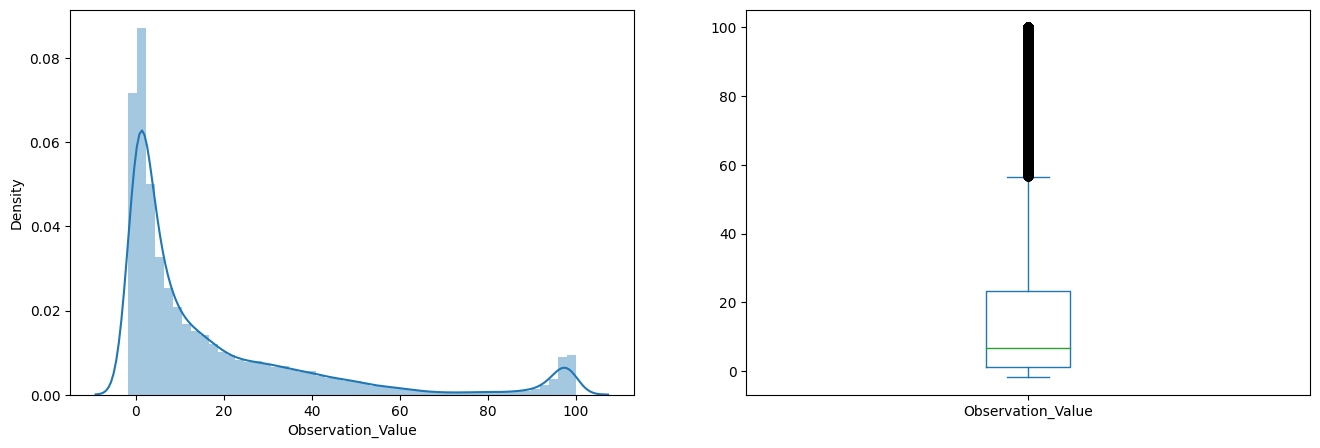

In [161]:
# Build diskplot and boxplot check how distribution of "Observation_Value" looks like with matplotlib
plt.figure(figsize=[16,5])
plt.subplot(121)
sns.distplot(nutri_africa["Observation_Value"]);
plt.subplot(122)
nutri_africa["Observation_Value"].plot.box(figsize=(16,5))
plt.show()

### **Observations**

*   The target variable "Observation_value is not normally distributed as seen in the density that is heavily skewed towards right.
*   There are presence of outliers as evident in the box-plot above






### **2. Univariate Analysis of Categorical Variable `Residence`**

In [162]:
nutri_africa["Residence"].value_counts()

Suburban    79925
Rural       12580
Urban       11975
Name: Residence, dtype: int64

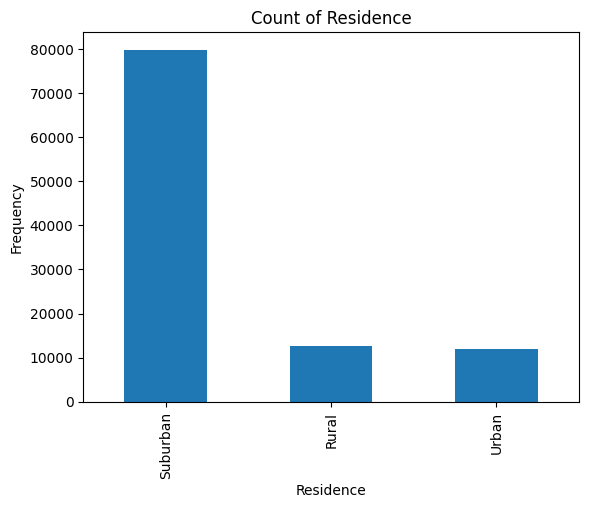

In [163]:
#Visualizing the number of different types of Residence
nutri_africa["Residence"].value_counts().plot(kind="bar", xlabel="Residence", ylabel="Frequency",title = "Count of Residence");

### **Observation**
Most African Mothers lives in a Suburban region of their country

### **3. Univariate Analysis of Categorical Variable `Poverty_Rating`**

In [164]:
nutri_africa["Poverty_Rating"].value_counts()

Poor            85444
Rich             9753
Middle class     9283
Name: Poverty_Rating, dtype: int64

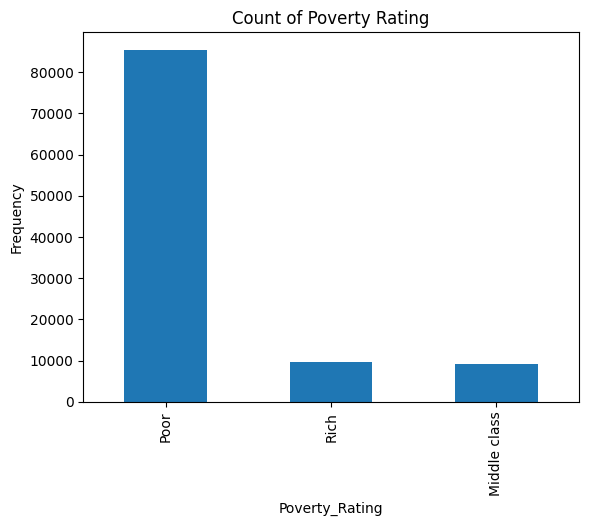

In [165]:
#Visualizing Poverty Ratings using pandas library
nutri_africa["Poverty_Rating"].value_counts().plot(kind="bar", xlabel="Poverty_Rating", ylabel="Frequency",title = "Count of Poverty Rating");

### **Observation**
Most African Mothers are from very poor homes

### **4. Univariate Analysis of Categorical Variable `Maternal_Education`**

In [166]:
nutri_africa["Maternal_Education"].value_counts()

No education           99593
Primary education       2199
Secondary education     2010
Tertiary education       678
Name: Maternal_Education, dtype: int64

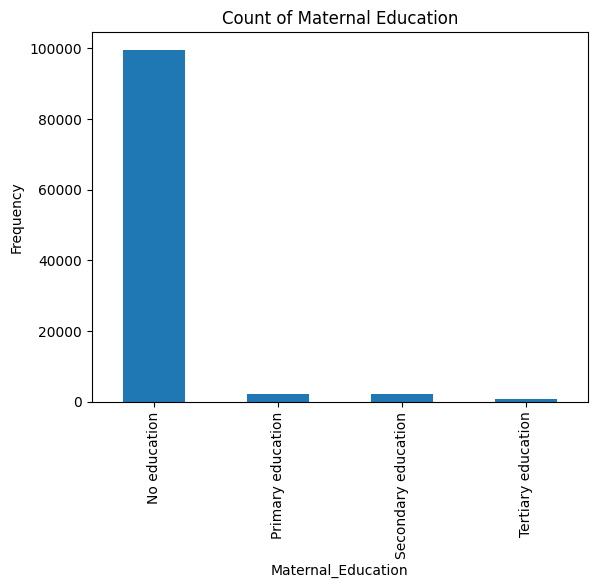

In [240]:
#Visualizing Maternal_Education using pandas library
nutri_africa["Maternal_Education"].value_counts().plot(kind="bar", xlabel="Maternal_Education", ylabel="Frequency",title = "Count of Maternal Education");

### **Observation**
Most African Mothers are uneducated

## **Bivariate Data Analysis**
Here, we shall carry out bivarate analysis of the

1.   Categorical Variable `Country` and Categorical Variable `Indicator`
3.   Categorical Variable `Region`  and Categorical Variable `Indicator`
2.   Categorical Variable `Maternal_Education` and Categorical Variable `Indicator`
4.    Categorical Variable `Poverty_Rating` and Categorical Variable `Indicator`




### **1. Bivariate Analysis of Categorical Variable `Country` and Categorical Variable `Indicator`**

In [168]:
# Count of indicator of interest categories
nutri_africa['Indicator'].value_counts()

Height-for-age <-2 SD (stunting)                         16391
Weight-for-height >+2 SD (overweight)                    16107
Mean BMI-for-age                                         15997
Weight-for-age <-2 SD (Underweight)                      15278
Weight-for-height <-2 SD (wasting)                       15249
Weight-for-height <-3 SD (severe wasting)                15248
Ever breastfed (0-23 months)                              5435
Minimum meal frequency (children aged 6 to 23 months)     2765
Introduction to solid, semi-solid foods (6-8 months)      2010
Name: Indicator, dtype: int64

In [169]:
# Country against indicators of interest
country_ind = nutri_africa.pivot_table(index='Country', columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [170]:
# Rename the indicators of interest columns
country_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
country_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
country_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
country_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
country_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
country_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
country_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
country_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
country_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [171]:
# Reset index
country_ind.reset_index(inplace=True)

country_ind.head()

Indicator,Country,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,Algeria,88.318293,14.118919,82.196875,0.589790,43.395000,4.330631,4.573874,2.034234,13.126426
1,Angola,95.002439,36.257576,79.046667,0.003297,31.583333,18.648913,4.850000,1.069565,3.220879
2,Benin,96.206897,34.351368,63.885075,-0.127660,47.447863,17.808303,5.991336,1.632852,2.059878
3,Botswana,80.500000,28.437778,72.366667,0.212222,0.000000,11.336667,7.533333,3.175556,10.147778
4,Burkina Faso,98.679825,27.525185,49.420408,-0.470621,48.243478,20.032460,8.697581,1.642339,1.071014


<Axes: xlabel='Indicator', ylabel='Indicator'>

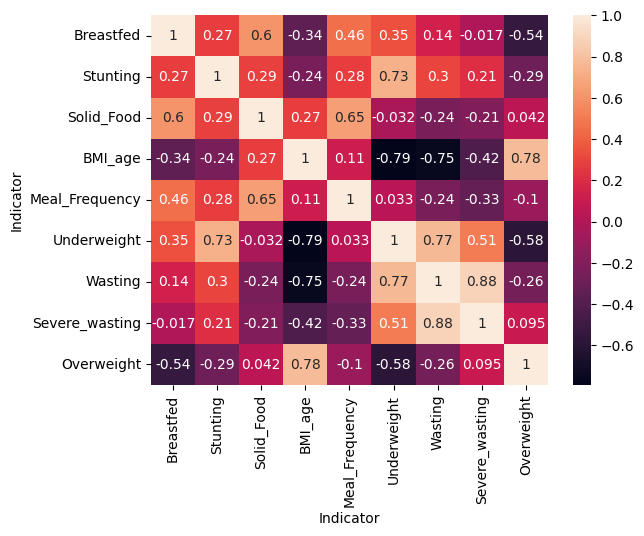

In [172]:
sns.heatmap(country_ind.corr(), annot=True)

In [173]:
# Top 10 countries in stunting
cst10 = country_ind.groupby('Country')['Stunting'].mean().nlargest(10).sort_values(ascending=True).reset_index()
cst10

,Country,Stunting
0,Ethiopia,40.153275
1,Central African Republic,41.018895
2,Zambia,42.415890
3,Democratic Republic of the Congo,43.152735
4,Mozambique,44.004219
5,Niger,44.866620
6,Malawi,45.172459
7,Madagascar,45.815132
8,Eritrea,46.678977
9,Burundi,54.313314


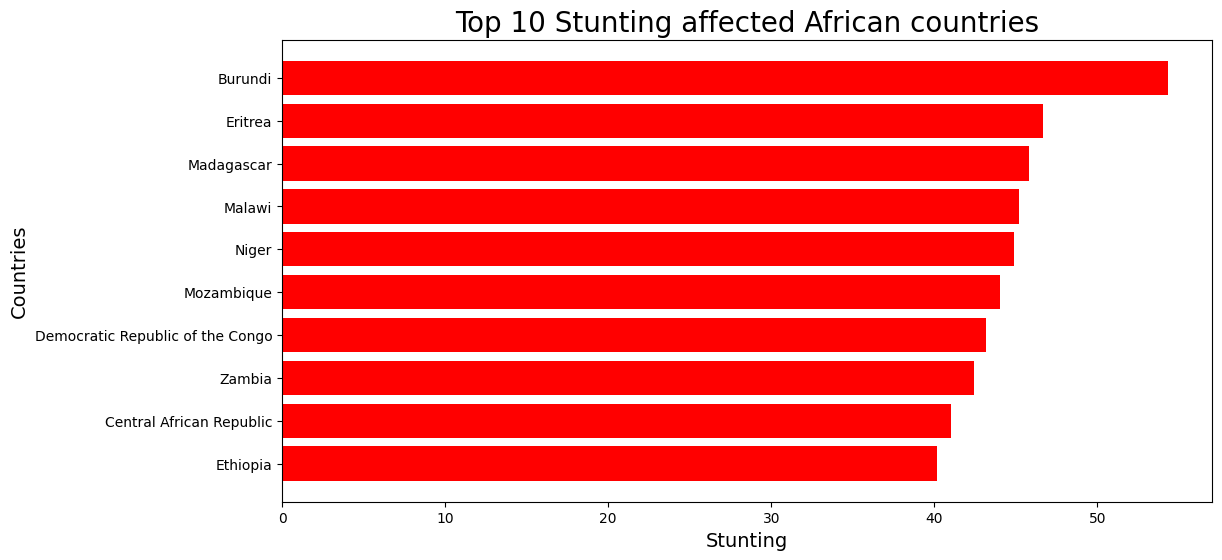

In [174]:
plt.figure(figsize = [12,6])
plt.barh(cst10['Country'], cst10['Stunting'], color = 'r')
plt.title('Top 10 Stunting affected African countries', fontsize = 20)
plt.xlabel('Stunting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('TopCountryStunting', bbox_inches = 'tight', dpi = 300)

In [175]:
# Least 10 countries in stunting
clt10 = country_ind.groupby('Country')['Stunting'].mean().nsmallest(10).sort_values(ascending=False).reset_index()
clt10

,Country,Stunting
0,Egypt,24.294324
1,South Africa,24.234520
2,Gambia,22.814067
3,Senegal,18.594369
4,Morocco,17.330970
5,Gabon,16.862162
6,Algeria,14.118919
7,Tunisia,9.390338
8,Seychelles,7.576471
9,Cabo Verde,0.000000


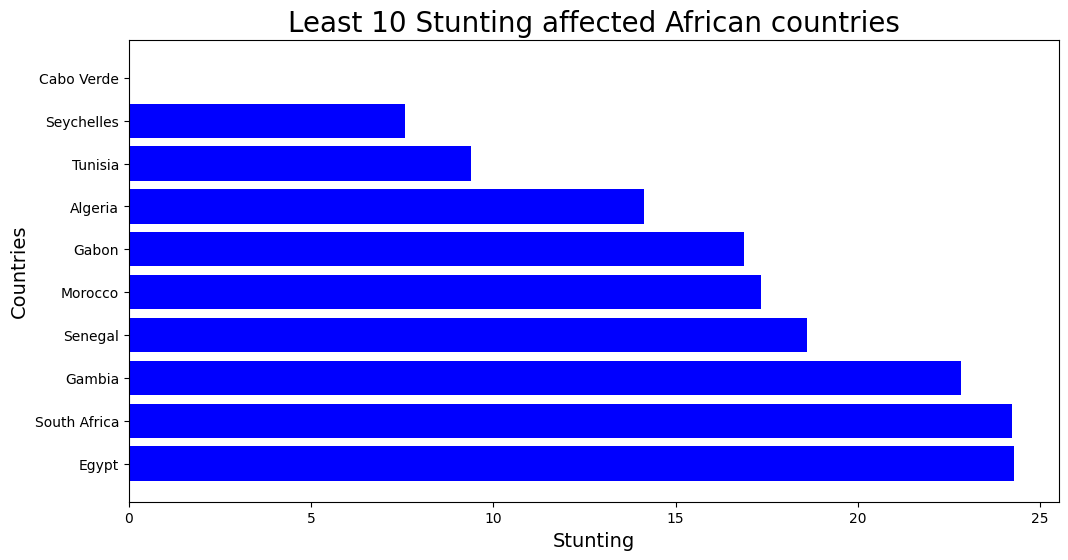

In [176]:
plt.figure(figsize = [12,6])
plt.barh(clt10['Country'], clt10['Stunting'], color = 'b')
plt.title('Least 10 Stunting affected African countries', fontsize = 20)
plt.xlabel('Stunting', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.savefig('MaxCountryStunting', bbox_inches = 'tight', dpi = 300)

### **2. Bivariate Analysis of Categorical Variable `Region` and Categorical Variable `Indicator`**

In [177]:
# Region against indicators of interest
region_ind = nutri_africa.pivot_table(index='Region', columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [178]:
region_ind.head()

Indicator,Ever breastfed (0-23 months),Height-for-age <-2 SD (stunting),"Introduction to solid, semi-solid foods (6-8 months)",Mean BMI-for-age,Minimum meal frequency (children aged 6 to 23 months),Weight-for-age <-2 SD (Underweight),Weight-for-height <-2 SD (wasting),Weight-for-height <-3 SD (severe wasting),Weight-for-height >+2 SD (overweight)
Region,,,,,,,,,
Central Africa,96.195548,36.573605,76.627542,-0.011153,33.741077,20.638362,8.428013,2.830829,5.399948
East Africa,97.205057,39.766547,73.719829,0.008423,43.758834,20.922700,7.700318,2.420064,4.678874
North Africa,93.314540,17.510387,80.341463,0.574958,52.102667,4.997932,5.211828,2.397932,13.964798
South Africa,94.302500,31.782170,87.070787,0.367355,53.870681,11.502622,4.261353,1.485684,7.744215
West Africa,97.142594,30.085423,59.689071,-0.331215,39.440949,19.669736,8.697291,2.132490,2.257215


In [179]:
# Rename the indicators of interest columns
region_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
region_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
region_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
region_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
region_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
region_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
region_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
region_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
region_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [180]:
region_ind.head()

Indicator,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
Region,,,,,,,,,
Central Africa,96.195548,36.573605,76.627542,-0.011153,33.741077,20.638362,8.428013,2.830829,5.399948
East Africa,97.205057,39.766547,73.719829,0.008423,43.758834,20.922700,7.700318,2.420064,4.678874
North Africa,93.314540,17.510387,80.341463,0.574958,52.102667,4.997932,5.211828,2.397932,13.964798
South Africa,94.302500,31.782170,87.070787,0.367355,53.870681,11.502622,4.261353,1.485684,7.744215
West Africa,97.142594,30.085423,59.689071,-0.331215,39.440949,19.669736,8.697291,2.132490,2.257215


<Axes: xlabel='Indicator', ylabel='Indicator'>

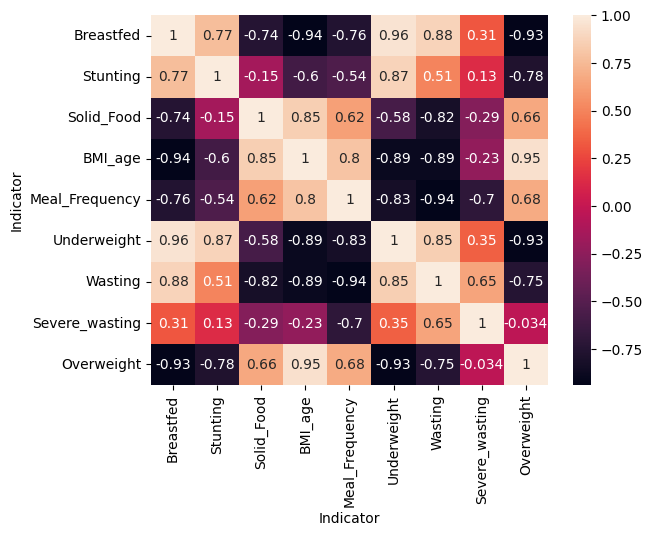

In [181]:
sns.heatmap(region_ind.corr(), annot=True)

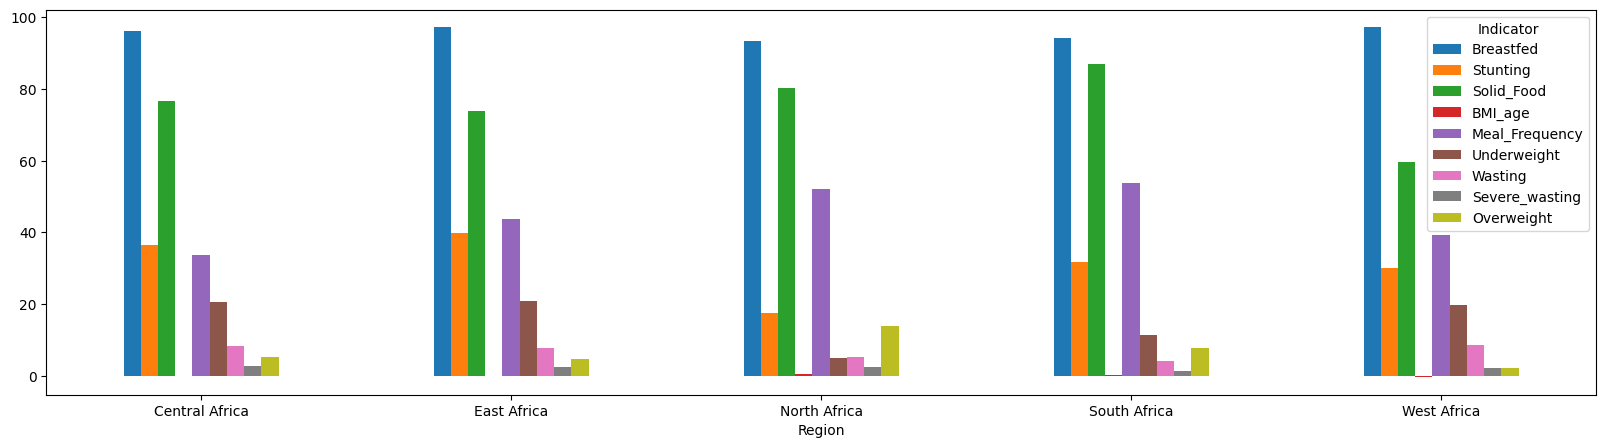

In [182]:
region_ind.plot(kind='bar', rot=0)
plt.gcf().set_size_inches(20, 5)

### **3. Bivariate Analysis of Categorical Variable `Maternal_Education` and Categorical Variable `Indicator`**

In [183]:
# Maternal Education against indicators of interest
education_ind = nutri_africa.pivot_table(index=['Maternal_Education'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [184]:
# Rename the indicators of interest columns
education_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
education_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
education_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
education_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
education_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
education_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
education_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
education_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
education_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [185]:
education_ind.head()

Indicator,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
Maternal_Education,,,,,,,,,
No education,96.458995,33.125537,68.789158,-0.043553,41.810847,18.129128,7.609177,2.245408,4.856592
Primary education,96.698958,35.245161,68.375000,0.009504,40.065934,17.932231,7.455785,2.409091,5.275918
Secondary education,96.255985,24.342358,76.744726,0.120179,47.055090,10.582063,5.863677,1.791480,6.405310
Tertiary education,94.807692,13.293023,86.960000,0.266667,60.587500,5.858824,4.714118,1.555294,9.217442


<Axes: xlabel='Indicator', ylabel='Indicator'>

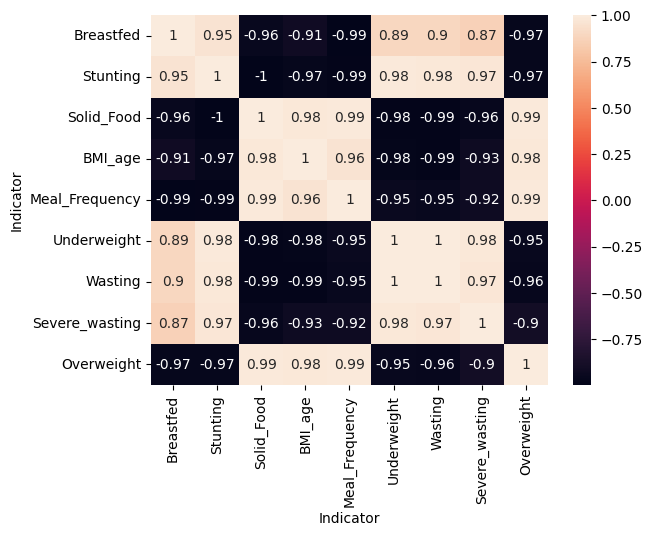

In [186]:
sns.heatmap(education_ind.corr(), annot=True)

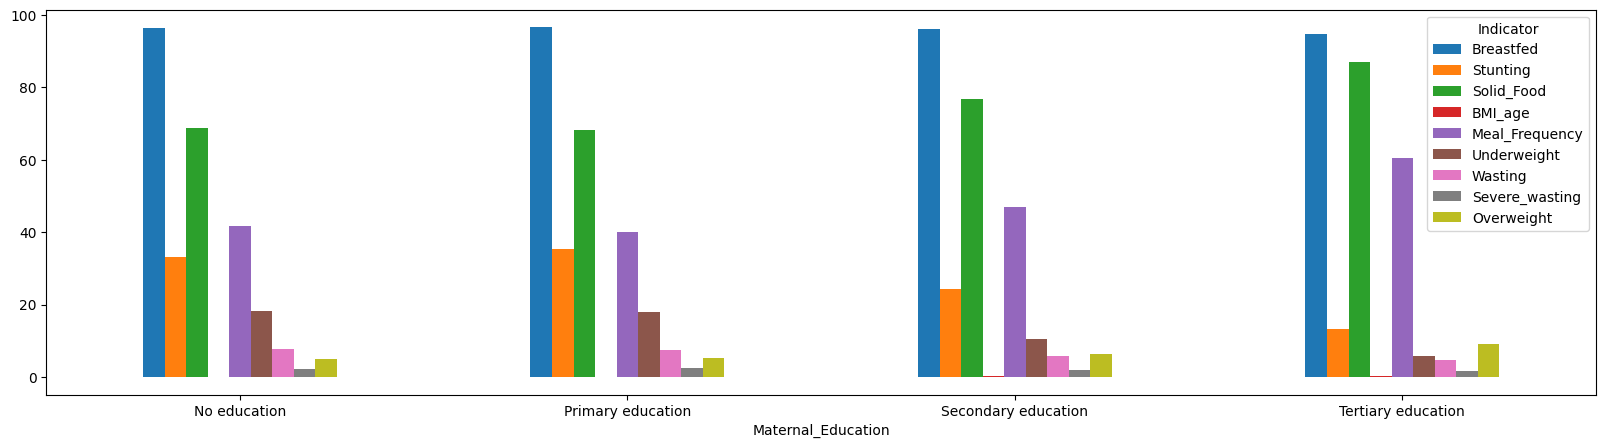

In [187]:
education_ind.plot(kind='bar', rot=0)
plt.gcf().set_size_inches(20, 5)

In [188]:
#grouping maternal education and breastfeeding

meb = education_ind.groupby('Maternal_Education')['Breastfed'].mean().reset_index()
meb

,Maternal_Education,Breastfed
0,No education,96.458995
1,Primary education,96.698958
2,Secondary education,96.255985
3,Tertiary education,94.807692


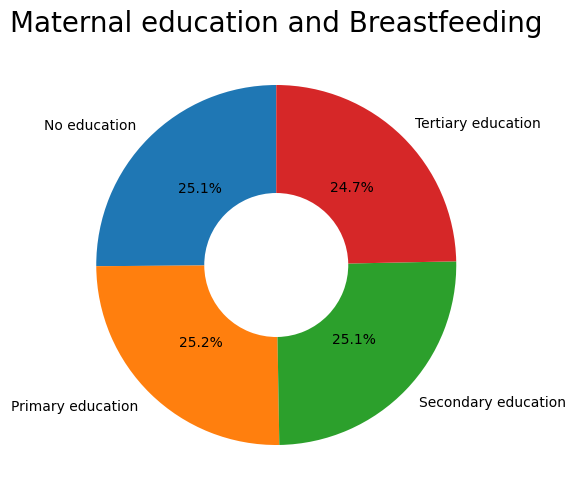

In [189]:
# Create a donut chart
plt.pie(meb['Breastfed'], labels=meb['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.25,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Breastfeeding', fontsize=20)
plt.savefig('MateduBreastfeed', bbox_inches = 'tight', dpi = 300)

In [190]:
# Grouping maternal education and severe wasting

mebsw = education_ind.groupby('Maternal_Education')['Severe_wasting'].mean().reset_index()
mebsw

,Maternal_Education,Severe_wasting
0,No education,2.245408
1,Primary education,2.409091
2,Secondary education,1.791480
3,Tertiary education,1.555294


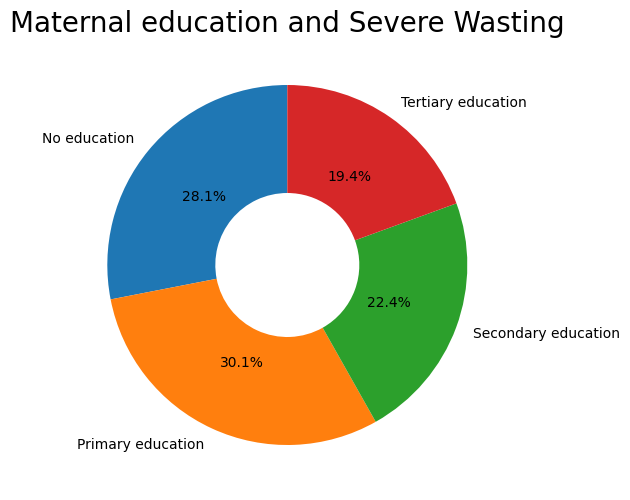

In [191]:
# Create a donut chart
plt.pie(mebsw['Severe_wasting'], labels=mebsw['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.25,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Severe Wasting', fontsize=20)
plt.savefig('MateduSW', bbox_inches = 'tight', dpi = 300)

In [192]:
# Grouping maternal education and underweight

mebuw = education_ind.groupby('Maternal_Education')['Underweight'].mean().reset_index()
mebuw

,Maternal_Education,Underweight
0,No education,18.129128
1,Primary education,17.932231
2,Secondary education,10.582063
3,Tertiary education,5.858824


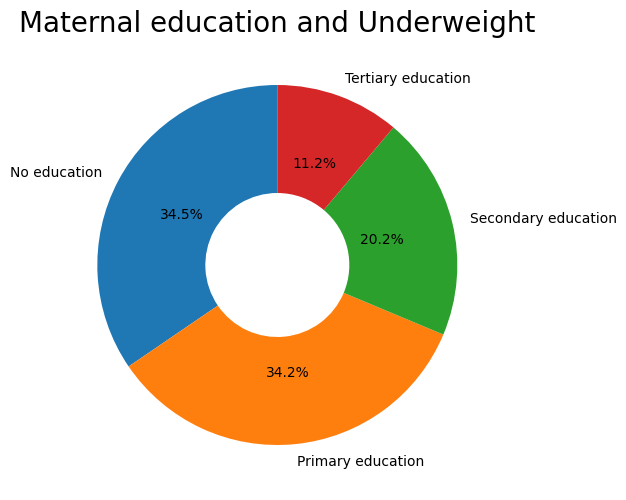

In [193]:
# Create a donut chart
plt.pie(mebuw['Underweight'], labels=mebuw['Maternal_Education'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.25,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Underweight', fontsize=20)
plt.savefig('MateduUW', bbox_inches = 'tight', dpi = 300)

### **4 Bivariate Analysis of Categorical Variable `Poverty_Rating` and Categorical Variable `Indicator`**

In [194]:
# Poverty_Rating against indicators of interest
poverty_ind = nutri_africa.pivot_table(index=['Poverty_Rating'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [195]:
# Rename the indicators of interest columns
poverty_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
poverty_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
poverty_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
poverty_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
poverty_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
poverty_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [196]:
# Reset index
#poverty_ind.reset_index(inplace=True)

poverty_ind.head()

Indicator,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
Poverty_Rating,,,,,,,,,
Middle class,96.473294,33.813651,69.824528,0.053275,42.061957,17.085285,7.156423,2.297073,5.694532
Poor,96.549717,33.591992,69.476587,-0.062927,42.202652,18.646544,7.764236,2.269263,4.688145
Rich,96.184449,25.562310,74.918852,0.113697,48.205435,12.066266,6.046812,1.880495,6.351795


<Axes: xlabel='Indicator', ylabel='Indicator'>

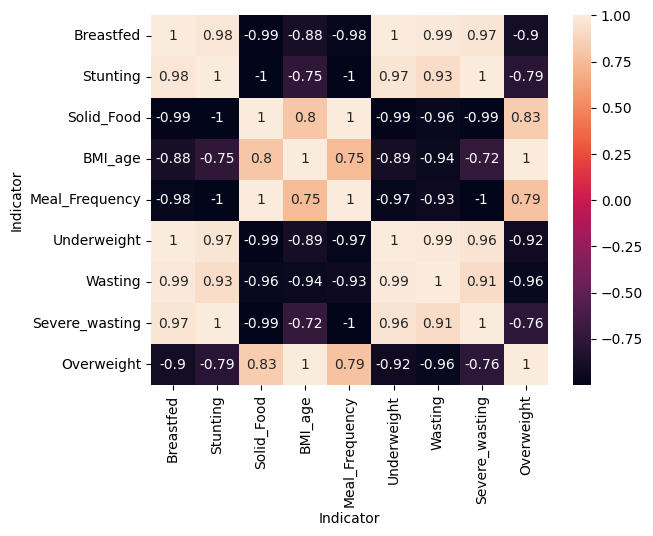

In [197]:
sns.heatmap(poverty_ind.corr(), annot=True)

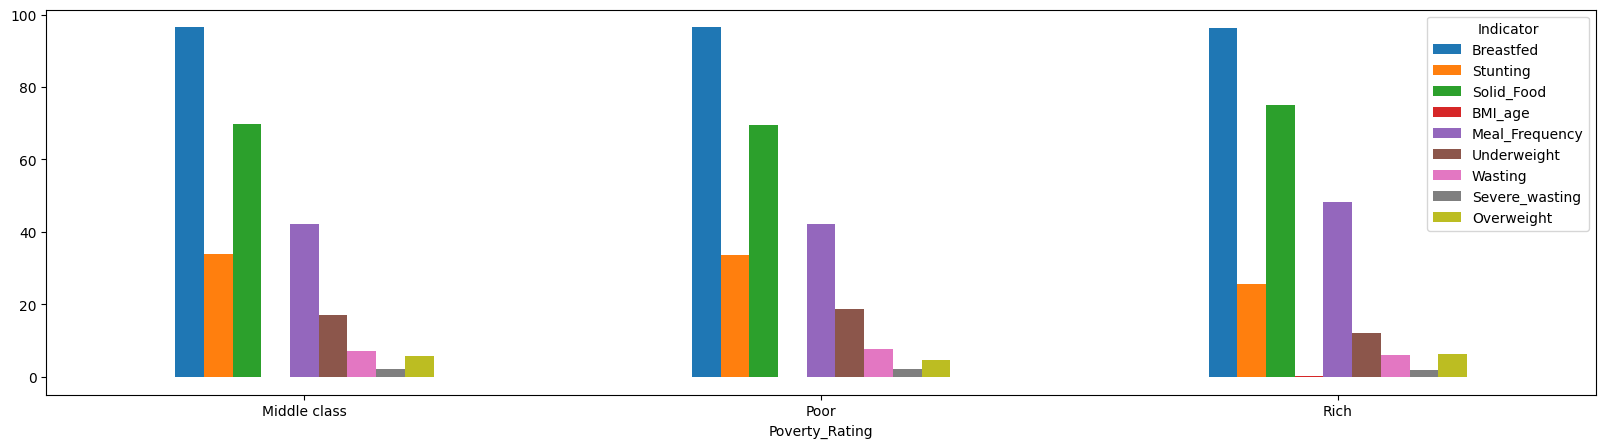

In [198]:
poverty_ind.plot(kind='bar', rot=0)
plt.gcf().set_size_inches(20, 5)

### **5 Bivariate Analysis of Categorical Variable `Year` and Categorical Variable `Indicator`**

In [199]:
year_ind = nutri_africa.pivot_table(index=['Year'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)
year_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
year_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
year_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
year_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
year_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
year_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
year_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
year_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
year_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [200]:
year_ind.reset_index()

Indicator,Year,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,2001-01-01,97.635000,43.087328,61.825000,-0.102755,0.000000,25.347658,11.014601,4.114876,5.291185
1,2002-01-01,98.776923,44.829412,88.033333,0.060208,0.000000,23.546367,9.382007,3.602076,7.130450
2,2003-01-01,97.279365,33.182545,68.791954,0.135091,0.000000,16.484182,7.780909,3.072364,7.537091
3,2004-01-01,97.363452,44.758444,77.177586,0.149111,0.000000,22.724889,9.269556,3.803333,7.468889
4,2005-01-01,96.153704,37.338799,62.356000,0.106735,0.000000,18.693275,8.179883,3.035036,7.046715
5,2006-01-01,96.666992,33.798034,56.813065,0.127710,40.980460,17.310736,8.314110,3.075051,7.551431
6,2007-01-01,95.545374,36.104444,68.925843,-0.021770,0.000000,19.351332,8.710379,3.099719,6.251826
7,2008-01-01,95.716601,32.847749,78.213483,0.113980,0.000000,15.960123,7.554004,2.220329,7.387294
8,2009-01-01,95.647321,37.317857,83.872727,-0.036829,66.665517,17.842537,6.844030,1.830100,3.649626
9,2010-01-01,96.379690,38.319533,67.268224,-0.070195,33.361255,20.867393,8.386906,2.607015,4.306859


In [201]:
year_ind.corr()

Indicator,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
Indicator,,,,,,,,,
Breastfed,1.000000,0.158960,0.950288,0.771644,0.356525,-0.324173,-0.303975,0.207986,0.558798
Stunting,0.158960,1.000000,0.174882,0.303812,-0.487289,0.790139,0.662860,0.820677,0.444717
Solid_Food,0.950288,0.174882,1.000000,0.745732,0.371556,-0.329721,-0.375849,0.113531,0.506455
BMI_age,0.771644,0.303812,0.745732,1.000000,-0.011982,-0.285995,-0.198641,0.361999,0.889079
Meal_Frequency,0.356525,-0.487289,0.371556,-0.011982,1.000000,-0.578935,-0.718692,-0.631670,-0.382404
Underweight,-0.324173,0.790139,-0.329721,-0.285995,-0.578935,1.000000,0.875414,0.670915,-0.020244
Wasting,-0.303975,0.662860,-0.375849,-0.198641,-0.718692,0.875414,1.000000,0.813888,0.174745
Severe_wasting,0.207986,0.820677,0.113531,0.361999,-0.631670,0.670915,0.813888,1.000000,0.633643
Overweight,0.558798,0.444717,0.506455,0.889079,-0.382404,-0.020244,0.174745,0.633643,1.000000


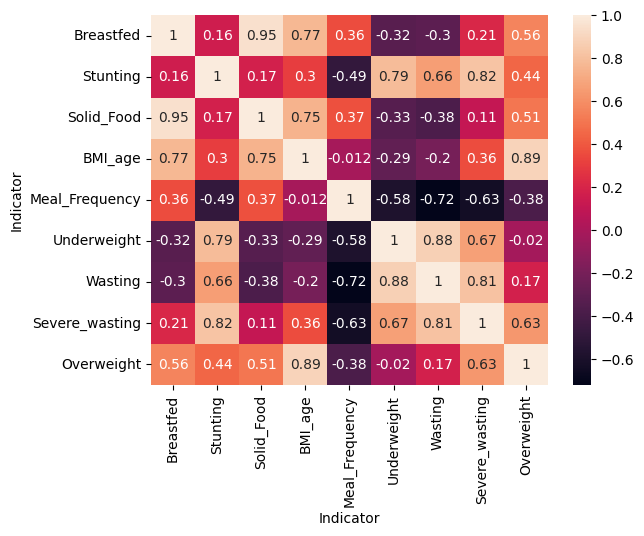

In [202]:
sns.heatmap(year_ind.corr(), annot=True)
plt.show()

## **Multivariate Data Analysis**
Here, we shall carry out multivarate analysis of the

`indicator` per `region` per `year`


In [203]:
# indicator by region and year
region_years_ind = nutri_africa.pivot_table(index=['Region', 'Year'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [204]:
#re-name indicators
region_years_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
region_years_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
region_years_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
region_years_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
region_years_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
region_years_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [205]:
#reset index
region_years_ind.reset_index()

region_years_ind.head()

Indicator                  Breastfed   Stunting  Solid_Food   BMI_age  \
Region         Year                                                     
Central Africa 2001-01-01   0.000000  44.603297    0.000000 -0.243956   
               2004-01-01  97.373077  37.970286   78.721429  0.130857   
               2005-01-01  95.600000   0.000000    0.000000  0.000000   
               2006-01-01  97.411842  40.946154   60.367857  0.206593   
               2007-01-01  97.241463  43.049495   83.593333 -0.003297   

Indicator                  Meal_Frequency  Underweight    Wasting  \
Region         Year                                                 
Central Africa 2001-01-01             0.0    29.786813  15.345055   
               2004-01-01             0.0    20.750286   9.074857   
               2005-01-01             0.0     0.000000   0.000000   
               2006-01-01             0.0    21.197802   9.672527   
               2007-01-01             0.0    24.985870  10.769565   

Indicator                  Severe_wasting  Overweight  
Region         Year                                    
Central Africa 2001-01-01        5.762637    6.720879  
               2004-01-01        3.612000    7.075429  
               2005-01-01        0.000000    0.000000  
               2006-01-01        3.678022    9.652198  
               2007-01-01        5.168478    7.506593

In [206]:
# stunting by region over years
sry = region_years_ind.groupby(['Region', 'Year'])['Stunting'].mean().reset_index()
sry

,Region,Year,Stunting
0,Central Africa,2001-01-01,44.603297
1,Central Africa,2004-01-01,37.970286
2,Central Africa,2005-01-01,0.000000
3,Central Africa,2006-01-01,40.946154
4,Central Africa,2007-01-01,43.049495
...,...,...,...
80,West Africa,2018-01-01,28.191837
81,West Africa,2019-01-01,28.814106
82,West Africa,2020-01-01,25.872774
83,West Africa,2021-01-01,26.937443


In [207]:
# Function to plot indicators by region over different variables
def plot_year_region_trend(data, indicator):
  plt.figure(figsize=(11, 7))

  # Get unique regions
  reg = data['Region'].unique()

  # Create subplots
  for i, region in enumerate(reg, start=1):
      plt.subplot(len(reg), 1, i)

      # Filter the DataFrame for the current region
      data_for_region = data[data['Region'] == region]

      # Plot the line for the current region
      sns.lineplot(data=data_for_region, x='Year', y=indicator, marker = 'o', ci=None)
      plt.savefig('Year{}'.format(indicator), bbox_inches = 'tight', dpi = 300)
      plt.title(region)  # Set the title as the region name

  # Adjust layout
  plt.tight_layout()

  plt.show()

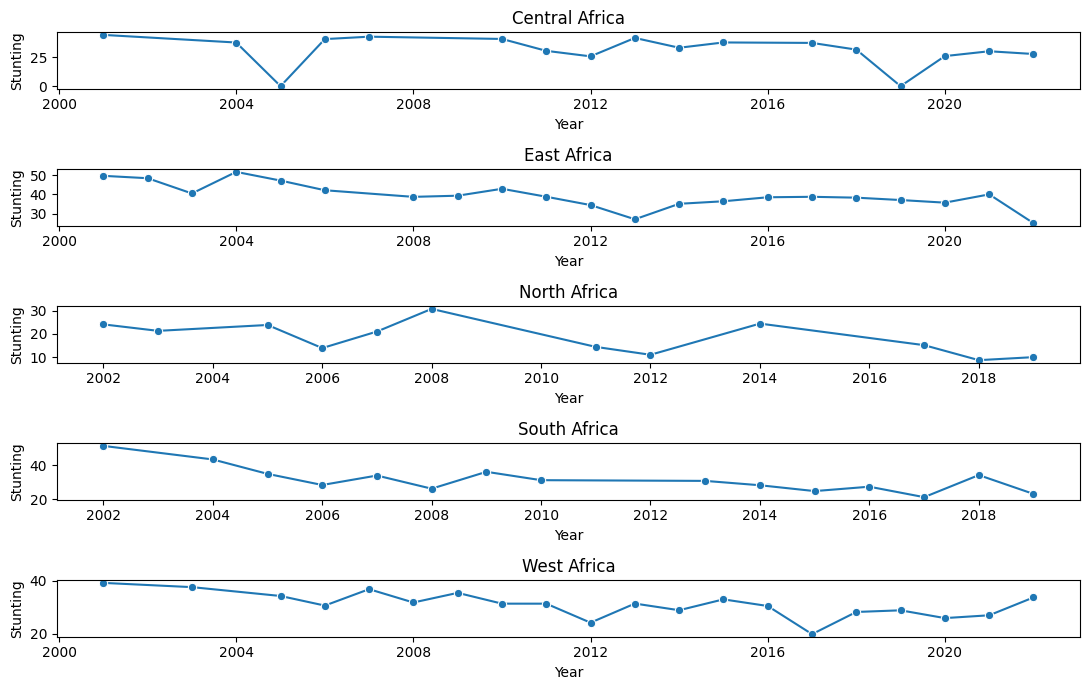

In [208]:
plot_year_region_trend(sry, 'Stunting')

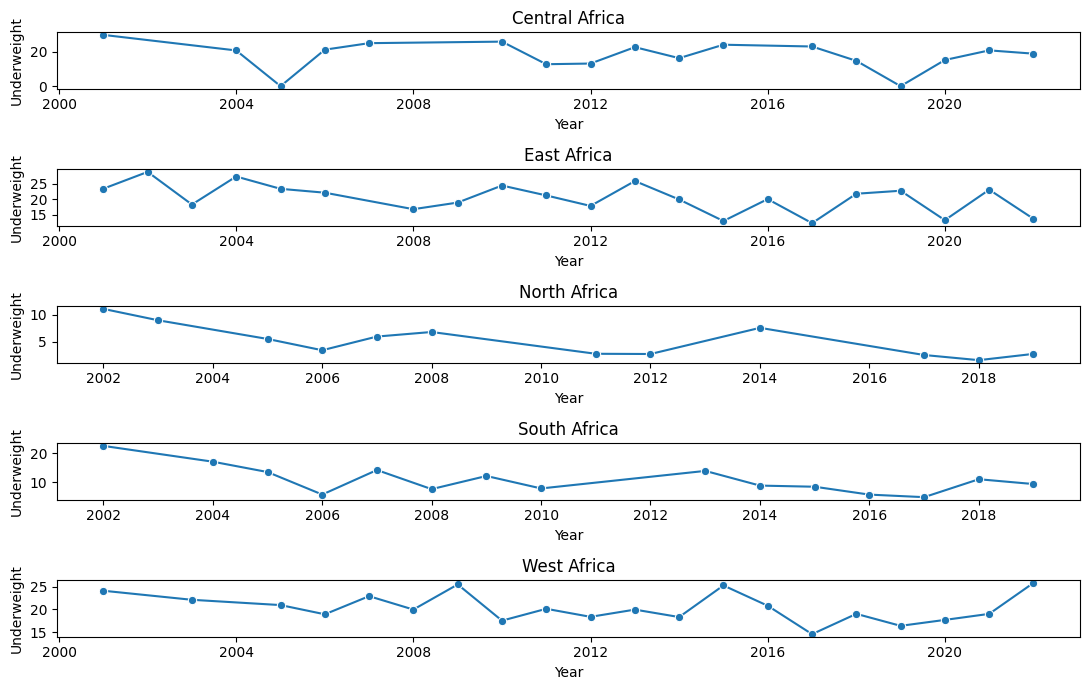

In [209]:
ury = region_years_ind.groupby(['Region', 'Year'])['Underweight'].mean().reset_index()
plot_year_region_trend(ury, 'Underweight')

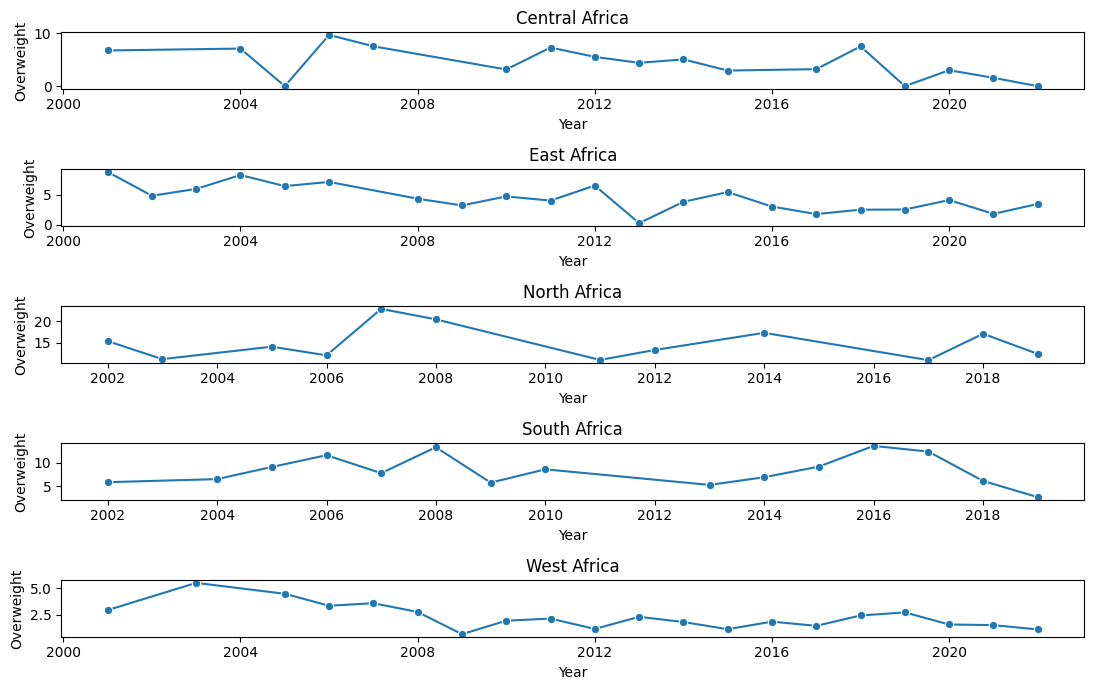

In [210]:
ory = region_years_ind.groupby(['Region', 'Year'])['Overweight'].mean().reset_index()
plot_year_region_trend(ory, 'Overweight')

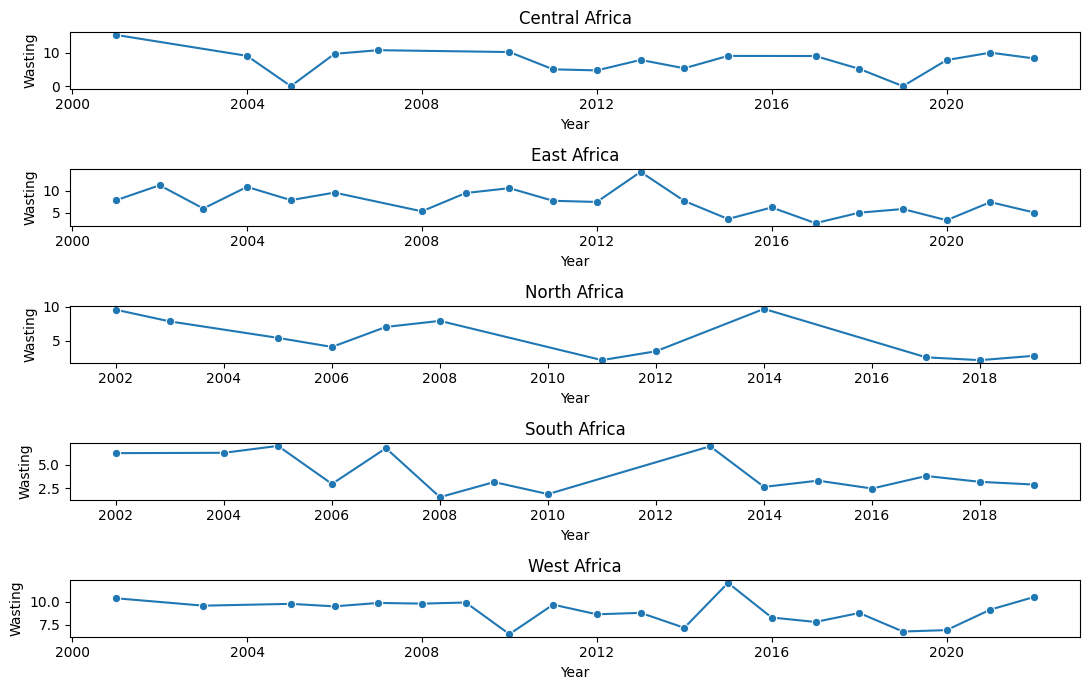

In [211]:

wry = region_years_ind.groupby(['Region', 'Year'])['Wasting'].mean().reset_index()
plot_year_region_trend(wry, 'Wasting')

In [212]:
poverty_region_ind = nutri_africa.pivot_table(index=['Region', 'Poverty_Rating'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [213]:
poverty_region_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
poverty_region_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
poverty_region_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
poverty_region_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
poverty_region_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
poverty_region_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [214]:

poverty_region_ind

Indicator                      Breastfed   Stunting  Solid_Food   BMI_age  \
Region         Poverty_Rating                                               
Central Africa Middle class    96.456604  37.716463   77.184375  0.093125   
               Poor            96.283333  37.366125   76.346809 -0.037370   
               Rich            95.778659  28.111628   78.812500  0.128824   
East Africa    Middle class    97.293226  42.931579   73.285484 -0.006831   
               Poor            97.233436  40.228568   73.509043  0.001275   
               Rich            97.071429  32.544258   77.145161  0.088642   
North Africa   Middle class    93.102469  16.392623   83.043750  0.592500   
               Poor            93.523429  17.991494   79.535644  0.564241   
               Rich            93.075309  14.932283   86.700000  0.638889   
South Africa   Middle class    94.392857  33.442593   87.762857  0.363426   
               Poor            94.828571  32.612821   86.590783  0.358993   
               Rich            93.292821  24.558403   92.400000  0.428151   
West Africa    Middle class    97.122890  29.065250   59.079167 -0.244359   
               Poor            97.191759  30.822500   59.304453 -0.347001   
               Rich            97.072350  21.450698   66.322222 -0.204773   

Indicator                      Meal_Frequency  Underweight   Wasting  \
Region         Poverty_Rating                                          
Central Africa Middle class         35.244444    19.999390  7.964024   
               Poor                 33.430370    21.405461  8.616825   
               Rich                 40.055556    14.143023  7.134884   
East Africa    Middle class         44.031579    22.520690  7.993966   
               Poor                 43.450098    21.393522  7.824225   
               Rich                 51.484211    15.348698  6.351302   
North Africa   Middle class         52.020000     4.579508  4.958197   
               Poor                 51.895556     5.206458  5.326667   
               Rich                 57.860000     3.823622  4.587402   
South Africa   Middle class         54.703846    11.820388  4.345146   
               Poor                 53.425656    11.993818  4.381861   
               Rich                 63.946154     8.059389  3.411354   
West Africa    Middle class         37.927174    17.702821  8.242051   
               Poor                 39.423052    20.346705  8.849370   
               Rich                 42.947826    12.893795  7.198337   

Indicator                      Severe_wasting  Overweight  
Region         Poverty_Rating                              
Central Africa Middle class          2.947561    6.255488  
               Poor                  2.861480    5.164512  
               Rich                  2.437791    6.744186  
East Africa    Middle class          2.447126    4.557337  
               Poor                  2.472131    4.616891  
               Rich                  1.940625    5.367488  
North Africa   Middle class          2.270492   14.080328  
               Poor                  2.450000   13.858506  
               Rich                  2.126772   14.660630  
South Africa   Middle class          1.400000    7.311574  
               Poor                  1.549117    7.691774  
               Rich                  1.155022    8.495798  
West Africa    Middle class          2.371795    3.026531  
               Poor                  2.131898    2.112989  
               Rich                  1.918290    3.429147

In [215]:
#reset index
poverty_region_ind.reset_index()

Indicator,Region,Poverty_Rating,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,Central Africa,Middle class,96.456604,37.716463,77.184375,0.093125,35.244444,19.999390,7.964024,2.947561,6.255488
1,Central Africa,Poor,96.283333,37.366125,76.346809,-0.037370,33.430370,21.405461,8.616825,2.861480,5.164512
2,Central Africa,Rich,95.778659,28.111628,78.812500,0.128824,40.055556,14.143023,7.134884,2.437791,6.744186
3,East Africa,Middle class,97.293226,42.931579,73.285484,-0.006831,44.031579,22.520690,7.993966,2.447126,4.557337
4,East Africa,Poor,97.233436,40.228568,73.509043,0.001275,43.450098,21.393522,7.824225,2.472131,4.616891
5,East Africa,Rich,97.071429,32.544258,77.145161,0.088642,51.484211,15.348698,6.351302,1.940625,5.367488
6,North Africa,Middle class,93.102469,16.392623,83.043750,0.592500,52.020000,4.579508,4.958197,2.270492,14.080328
7,North Africa,Poor,93.523429,17.991494,79.535644,0.564241,51.895556,5.206458,5.326667,2.450000,13.858506
8,North Africa,Rich,93.075309,14.932283,86.700000,0.638889,57.860000,3.823622,4.587402,2.126772,14.660630
9,South Africa,Middle class,94.392857,33.442593,87.762857,0.363426,54.703846,11.820388,4.345146,1.400000,7.311574


In [216]:
# Function to plot indicators by region over different variables
def plot_indicator_region(data, indicator, label):
  plt.figure(figsize=(17, 11))

  # Get unique regions
  reg = data['Region'].unique()

  # Create subplots
  for i, region in enumerate(reg, start=1):
      plt.subplot(len(reg), 3, i)

      # Filter the DataFrame for the current region
      data_for_region = data[data['Region'] == region]

      # Create a donut chart
      plt.pie(data_for_region[indicator], labels=data_for_region[label], autopct='%1.1f%%', startangle=90)

      # Draw a circle in the center to create the donut effect
      #centre_circle = plt.Circle((0,0),0.25,fc='white')
      #fig = plt.gcf()
      #fig.gca().add_artist(centre_circle)

      # Equal aspect ratio ensures that pie is drawn as a circle
      plt.tight_layout()
      plt.savefig('{}{}'.format(label,indicator), bbox_inches = 'tight', dpi = 300)

      plt.title(region)  # Set the title as the region name

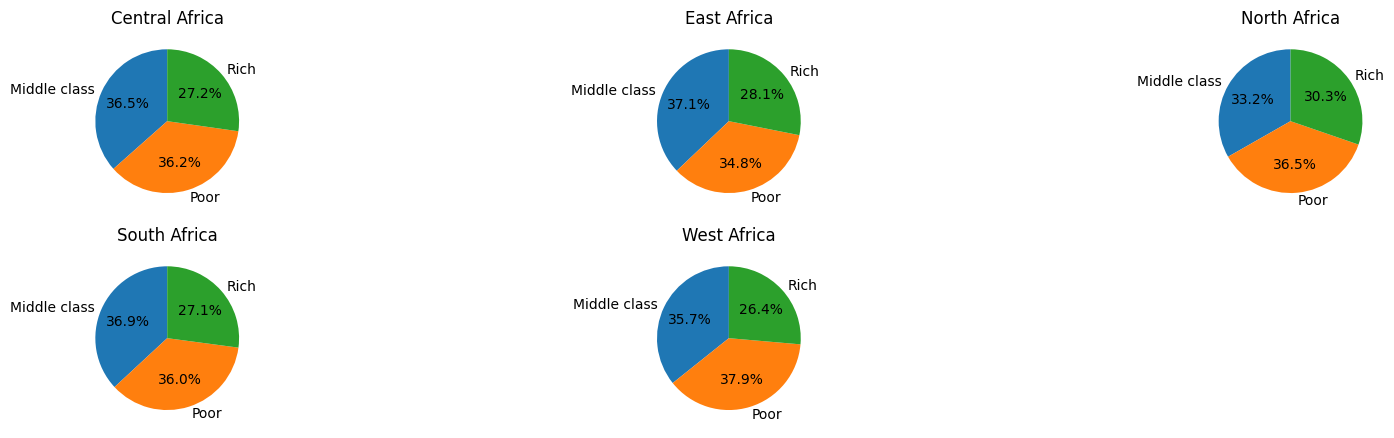

In [217]:
srp = poverty_region_ind.groupby(['Region', 'Poverty_Rating'])['Stunting'].mean().reset_index()
plot_indicator_region(srp, 'Stunting', 'Poverty_Rating')

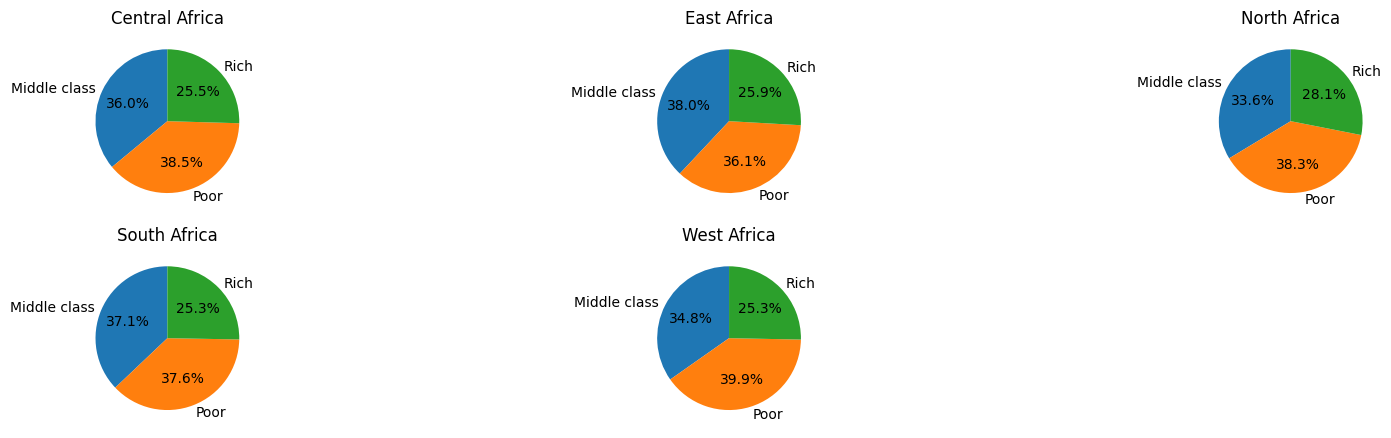

In [218]:
urp = poverty_region_ind.groupby(['Region', 'Poverty_Rating'])['Underweight'].mean().reset_index()
plot_indicator_region(urp, 'Underweight', 'Poverty_Rating')

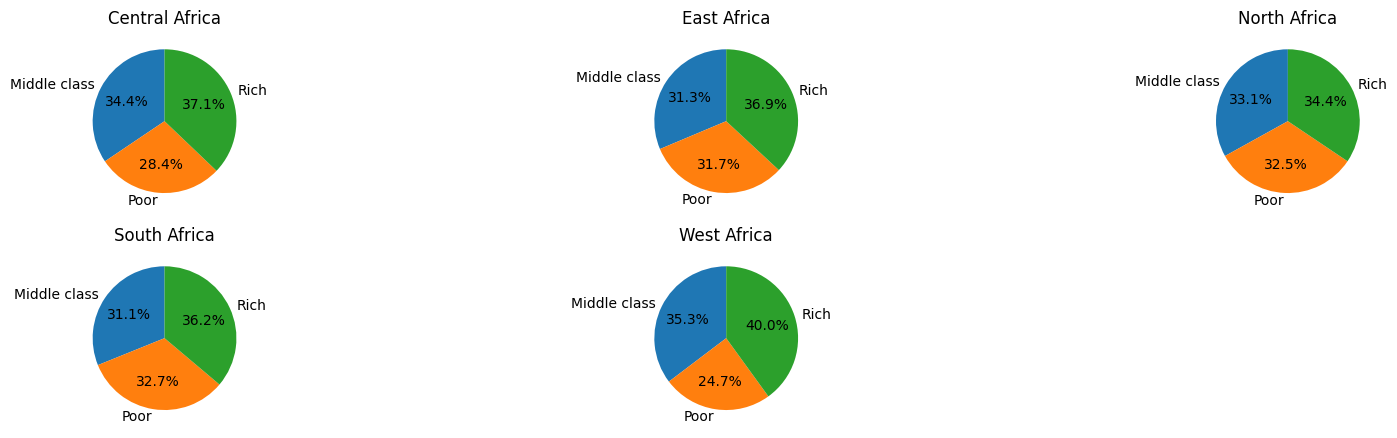

In [219]:
orp = poverty_region_ind.groupby(['Region', 'Poverty_Rating'])['Overweight'].mean().reset_index()
plot_indicator_region(orp, 'Overweight', 'Poverty_Rating')

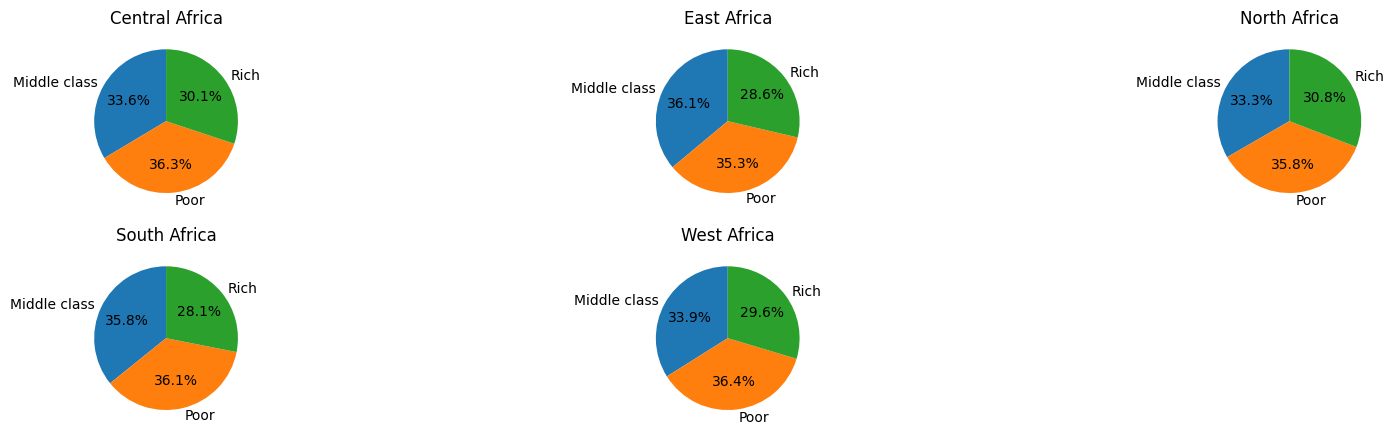

In [220]:
wrp = poverty_region_ind.groupby(['Region', 'Poverty_Rating'])['Wasting'].mean().reset_index()
plot_indicator_region(wrp, 'Wasting', 'Poverty_Rating')

In [221]:
region_country_ind = nutri_africa.pivot_table(index=['Region', 'Country'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)
region_country_ind.rename(columns = {'Ever breastfed (0-23 months)':'Breastfed'}, inplace = True)
region_country_ind.rename(columns = {'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
region_country_ind.rename(columns = {'Introduction to solid, semi-solid foods (6-8 months)':'Solid_Food'}, inplace = True)
region_country_ind.rename(columns = {'Mean BMI-for-age':'BMI_age'}, inplace = True)
region_country_ind.rename(columns = {'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace = True)
region_country_ind.rename(columns = {'Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
region_country_ind.rename(columns = {'Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
region_country_ind.rename(columns = {'Weight-for-height <-3 SD (severe wasting)':'Severe_wasting'}, inplace = True)
region_country_ind.rename(columns = {'Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)

In [222]:
region_country_ind.reset_index()

Indicator,Region,Country,Breastfed,Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_wasting,Overweight
0,Central Africa,Angola,95.002439,36.257576,79.046667,0.003297,31.583333,18.648913,4.850000,1.069565,3.220879
1,Central Africa,Cabo Verde,95.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Central Africa,Cameroon,95.722222,32.523210,77.086667,0.367462,51.820000,13.973536,5.695445,1.908243,8.775705
3,Central Africa,Central African Republic,95.511842,41.018895,76.477419,-0.106395,22.593548,23.382267,8.102326,2.433721,3.570349
4,Central Africa,Chad,97.270339,36.218290,67.952381,-0.396806,33.671930,26.667221,13.071883,4.180440,2.641769
5,Central Africa,Democratic Republic of the Congo,97.999359,43.152735,80.454237,-0.063020,30.048864,24.857330,9.708753,3.702626,5.471772
6,Central Africa,Equatorial Guinea,0.000000,29.602326,0.000000,0.500000,0.000000,8.002326,3.386047,1.753488,9.000000
7,Central Africa,Gabon,90.733333,16.862162,81.807143,0.277419,0.000000,6.122523,3.320721,1.208108,7.259459
8,East Africa,Burundi,98.560494,54.313314,78.422581,-0.044509,37.631667,28.104249,5.201149,1.005764,2.077457
9,East Africa,Comoros,92.459524,30.369892,80.100000,0.013978,28.023333,16.336559,11.230108,4.401075,10.612903


In [231]:
def plot_bbchart(data, _x, _y, _color, _hover):
  fig = px.scatter(data, x=_x, y=_y,
  	         size=_y, color=_color,
                   hover_name=_hover, log_x=True, size_max=60)
  plt.savefig('{}{}'.format(_x,_y), bbox_inches = 'tight', dpi = 300)
  fig.show()

In [232]:
sbrc = region_country_ind.groupby(['Region', 'Country', 'Breastfed'])['Stunting'].mean().reset_index()
plot_bbchart(sbrc, 'Breastfed', 'Stunting', 'Region', 'Country')

<Figure size 640x480 with 0 Axes>

In [236]:
obrc = region_country_ind.groupby(['Region', 'Country', 'Breastfed'])['Overweight'].mean().reset_index()
plot_bbchart(obrc, 'Breastfed', 'Overweight', 'Region', 'Country')

<Figure size 640x480 with 0 Axes>

In [237]:
ubrc = region_country_ind.groupby(['Region', 'Country', 'Breastfed'])['Underweight'].mean().reset_index()
plot_bbchart(ubrc, 'Breastfed', 'Underweight', 'Region', 'Country')

<Figure size 640x480 with 0 Axes>

In [238]:
wbrc = region_country_ind.groupby(['Region', 'Country', 'Breastfed'])['Wasting'].mean().reset_index()
plot_bbchart(wbrc, 'Breastfed', 'Wasting', 'Region', 'Country')

<Figure size 640x480 with 0 Axes>